# Scraping tripadvisor

In [205]:
import os
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup, SoupStrainer
import re
from tqdm import tqdm

In [2]:
# Primero vamos a crear una función que extraiga todos los links individuales
# de los restaurantes.
def get_restaurants(url_base, headers):
    # Vamos a utilizar la API de tripadvisor para hacer la busqueda más sencilla
    pagina = 0
    enlaces_final = []
    n0 = len(enlaces_final)
    n1 = 1
    while n1 > n0:
        url = url_base + str(pagina)
        request = requests.get(url, headers = headers)
        # Nos quedamos con todos los links de la página
        restaurantes = BeautifulSoup(request.content, parse_only = SoupStrainer('a'))
        enlaces = [link['href'] for link in restaurantes if link.has_attr('href')]
        # Nos quedamos solo con los enlaces que nos interesan
        enlaces = np.unique(enlaces)
        filtro = ["Restaurant_Review" in enlace for enlace in enlaces]
        enlaces = enlaces[filtro]
        filtro = ["#REVIEWS" not in enlace for enlace in enlaces]
        enlaces = enlaces[filtro]
        # Pegamos con resultados previos
        n0 = len(enlaces_final)
        enlaces_final = np.append(enlaces_final, enlaces)
        enlaces_final = np.unique(enlaces_final)
        n1 = len(enlaces_final)
        # Las páginas se construyen de 30 en 30 restaurantes
        pagina += 30
    else:
        return(enlaces_final)

In [3]:
# Probamos la función
url_base = "https://www.tripadvisor.co/RestaurantSearch?Action=PAGE&ajax=1&availSearchEnabled=false&sortOrder=popularity&geo=294074&itags=10591&o=a"
headers = {
    'authority': 'www.tripadvisor.co',
    'method': 'GET',
    'path': '/RestaurantSearch?Action=PAGE&ajax=1&availSearchEnabled=false&sortOrder=popularity&geo=294074&itags=10591&o=a0',
    'scheme': 'https',
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'es-ES,es;q=0.9,en;q=0.8',
    'cookie': 'TAUnique=%1%enc%3A7zweuZcTl2e7FO%2FLHUqh65n4hoEuYztlsC83DOJ%2F9wnmhWnEwXwJZw%3D%3D; TASSK=enc%3AAK6t0LAoHGAeAUf2dgE1McybWdxvFuMCdSCItR09D%2FyUGHRdBFcIq76ZGJUD7N7md29N6M4tXTbnnmTd7efDikXvQ042O0KsHWcp8ZsWYgoZwWVYODGlnkIwjchAyWzkUQ%3D%3D; TATrkConsent=eyJvdXQiOiJBRFYsRlVOQ1RJT05BTCxTT0NJQUxfTUVESUEiLCJpbiI6IkFOQSJ9; fbm_162729813767876=base_domain=.tripadvisor.co; VRMCID=%1%V1*id.10568*llp.%2FAttractions-g297473-Activities-Barranquilla_Atlantico_Department%5C.html*e.1644269853475; TART=%1%enc%3AnmpzwWfuUAy3Bl7IzouhwtHgT%2B6xZEA%2FD4Rx5%2BT%2FvQvchMKVmWg4jvGmQmqv1dVSxE6hmieC2B4%3D; TATravelInfo=V2*AY.2022*AM.2*AD.20*DY.2022*DM.2*DD.21*A.2*MG.-1*HP.2*FL.3*DSM.1644532126765*RS.1; TADCID=Hop10Jj415F0HEpsABQCFdpBzzOuRA-9xvCxaMyI12t-LJi76EZWekQemvFcvX3kYymJlje22_LH1ml64HHKE-kZY6X5EwbcQ9I; TAAUTHEAT=28PyOmK0t6kJlGI0ABQCab7fMZ8ORguCqJF_E5GxfStVLP32LarEb-JdfDYS_5W0C62vXt8EMu_Gb-Oadjoan6oTbBwEde5esMoBIIly-H8oMrY2PHUhLxUBhJm64uYZ2rOsHvpFo__c3q2sCPm0xcluEHQGejfmqpoYCcpHPkSzwwZdFRpQUp48i1CojvvQIQgFlwuc8K8YB4FT5Jed; ServerPool=B; TAUserLocation=%1%4.673557%26-74.05866%26%26tt%261644693087187; TAReturnTo=%1%%2FRestaurants-g294074-Bogota.html; __vt=s6S5Xqhj0EIBxr-xABQCIf6-ytF7QiW7ovfhqc-AvRthMaZWqk_uy7orbpkTGwtusAB53DhFf9vXPmGt_kGH135ADfderKP5KCKhLvhiFKVOjlNaqYMnqmILdWMF42dRwYu2u_IxcSLNJlhFq6n1IgXa4g; TASID=A782DA2607A34496915CEB1154AC7FC2; ak_bmsc=C644A49536B515E1E169642AD003D9C2~000000000000000000000000000000~YAAQ1X1FyNS2Gbh+AQAAx61J9A5PPQaJ6AKUzQPRCC3bXH19SQXpTPIOxulLxX24hNw843M2CdZ3XcFp7clls9njR1b1pvlmRp4PIQj9FmPUDo0y7dZzcE8CIygLBVOx90DshLl5wPs4gFGCEkHzC4+2M2r3LKizHVx2u0gDJLbTc1Z3RTk2GvP7f/dVY3fLtMQQSeDYvx1FTTGSEgE7SKUCAA/c1/mGW4irdkKrqV2d4G9bk34UFH/J8DZRFBOflW0/cSQDY9vNyyMm2pQcHSNFIBh+ttzbHjkCUkwm8rMb+TRCqLQDnwLhBkCPQ2GJLQVZaET39EkcA6/W/GBeKswGGB2RD3pto11Hs7LaY7Cu1sJTw5QaS9mMx1Oz4CowisLeXBGSXq5OFoHAh20=; PAC=AAII2V5W1-J6ujRuImBV0Zk5s_2VorplascKQ5WDyyP8uCV1k_yR5rwvA6TDW4KeI5j6n3YpMdt9zQyHhz_mp34grZROINB-blr32P7ZkbXyyRkj9R8uaRu6CniykhRF1Q%3D%3D; PMC=V2*MS.85*MD.20211220*LD.20220213; fbsr_162729813767876=uBpsRjSdsuCWYM_8Asj0YfRMYeAYy5lcCS7sY31uu5Y.eyJ1c2VyX2lkIjoiMTAxNTU3Mjk2NTc2Njc0OTIiLCJjb2RlIjoiQVFCbHdRQUV3MFkwT3lnVDlEUnRCY1FXVmxlXzRGRkh3R3ExS245M1ZOdWdKTFFwNWViemF5a1ZlRjhKdHlERjhaNUZIX3dhanlaam00WEJpYVZWQ0VWZjVDZUtsMHBlcGhPcVY5ZnBNanVsT212T3NVSnFsbmNuT1QxOWJZc0liSlgyU3dhUk56bWctYm0tN1dCMzlyYWkxaWFOMkpjWHNNTzg1cnFzRnhDM3lsSDlaaWZxSnp1YnZINHV4UnRSb0QtWnBVQUJtZ2dncU1UUWhxd1ZNdzhfSGVzWFFRTmc1b2NPRWh0ZzBFelpPY1JzUGM5dmtLZ0l0VzZsZE5JemVucWlGcXhjVEJQWU0zcy05cEZDNlVzeE1Wa3R3QWNtZGF3U21fLTR5T25NQ1dMUFc1Ujk0RVJmbTNLeE9NaVhpUFkiLCJvYXV0aF90b2tlbiI6IkVBQUNVQUh5WkJkc1FCQUpTdDRSNm0zd0xyRWM4MHdRN01MWkJXeUdxWVVSQUg0OUhFMG9DRmRGbVVCelhKWkI5TFRaQURqTzdmYWZLVDhFUnVUZEZGWkE0b3VmY2pCMlFodURqS1JJYlU2c0RGbnVXbjdiMnpMSWcxVUFaQXBiSEZ5S2hCTGhGelpDZEhyZXVyYmRvWkN4aWJaQkVWODBYckFwQ2hRNVNscnIxbFpDWkI3UW00Y0pRNjVaQiIsImFsZ29yaXRobSI6IkhNQUMtU0hBMjU2IiwiaXNzdWVkX2F0IjoxNjQ0Nzc2MTI1fQ; roybatty=TNI1625!AEOWNX%2FkeI5GX9rD%2BEXO2gF2LixEEhKDghu%2FLS1hsUb8qAX%2BCPZ98SH%2BjvHwr%2F3ufIraz5BJlVtLTj9RZjqxykqLSJbM3bQyZ%2BC%2BaLoubwNN8a06XZj64upHm%2BtiguqKTLr8SHRsaPCdPN3mJlr7c2hlUxuGOdSvGT%2Fi2B6j%2BUIJ%2C1; OptanonConsent=isGpcEnabled=0&datestamp=Sun+Feb+13+2022+13%3A15%3A38+GMT-0500+(hora+est%C3%A1ndar+de+Colombia)&version=6.30.0&isIABGlobal=false&hosts=&consentId=5D43633284CAE68F305427142750ED88&interactionCount=1&landingPath=NotLandingPage&groups=C0001%3A1%2CC0002%3A1%2CC0004%3A0&AwaitingReconsent=false; TASession=V2ID.A782DA2607A34496915CEB1154AC7FC2*SQ.20*LS.Restaurants*GR.81*TCPAR.89*TBR.26*EXEX.67*ABTR.0*PHTB.57*FS.85*CPU.69*HS.recommended*ES.popularity*DS.5*SAS.popularity*FPS.oldFirst*TS.5D43633284CAE68F305427142750ED88*FA.1*DF.0*RT.0*TRA.true*LD.294074*FBC.1*EAU.E; TAUD=LA-1643398198997-1*RDD-1-2022_01_28*ARC-266860005*HDD-1133927657-2022_02_20.2022_02_21*LG-1377993684-2.1.F.*LD-1377993685-.....; bm_sv=9BFF917C81F4E8CB1FF67DFC5DE42C6C~hkPsGcJP0XgUCJmD+DgVKCz5A9GRBVR+IF+gdAi3LkZ/xg95EnNjCttSpEsPlaeLOt/R6L6tcqtuae+XjAHXD7M78Lhnzsh86ftuqQxgS6coyg1QmPIHWHVfflu090xrk0Gqs4IWFvSWXEl1BEiwGRoSx8WanuWWUm80/lTIcYE=',
    'dnt': '1',
    'referer': 'https://www.tripadvisor.co/Restaurants-g294074-Bogota.html',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="98", "Google Chrome";v="98"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36',
    'x-requested-with': 'XMLHttpRequest'}
    
enlaces = get_restaurants(url = url_base, headers = headers)

In [14]:
# Guardamos los resultados como un dataframe
enlaces_df = pd.DataFrame(enlaces, columns = ["link"]).assign(scrapeado = False)
enlaces_df.to_csv("./data/enlaces_tripadvisor.csv", sep = ";", index = False)

In [816]:
# Creamos una función que extraiga la información más relevante de un 
# restaurante y luego añada todos los comentarios
def get_reviews(url_base, enlace_restaurante, headers): 
    # Entramos a la página del restaurante
    url = url_base + enlace_restaurante
    request = requests.get(url, headers = headers)
    review = BeautifulSoup(request.content)

    # Extraemos las generalidades del restaurante
    nombre = review.find_all("div", {"class": "eTnlN _W w O"})[0].next.next
    try:
        puntaje = review.find_all("div", {"class": "eEwDq"})[0].next.next
        n_comentarios = review.find_all("div", {"class": "eEwDq"})[0].get_text().split(u'\xa0')[1]
        calificaciones = review.find_all("div", {"class": "node-preserve is-hidden-tablet"})[0] \
            .get_text("|").split("|")
        excelente = calificaciones[2]
        muy_bueno = calificaciones[4]
        regular = calificaciones[6]
        malo = calificaciones[8]
        pesimo = calificaciones[10]
        posicion_relativa = review.find_all("div", {"class": "fYCpi"})[0].next.text.split(u'\xa0')[1].replace(r".", "")
        total_restaurantes = re.findall(r'\d+', review.find_all("div", {"class": "fYCpi"})[0].span.next.next.replace(r".", ""))[0]
    except:
        puntaje = np.nan

    try:
        detalles = review.find_all("div", {"class": "guXtP"})[0].get_text("|").split("|")
        nombres = [str(x).lower().replace(" ", "_") for x in detalles[::2]]
        caracteristicas = detalles[1::2]
        caracteristicas = dict(zip(nombres, caracteristicas))
    except:
        caracteristicas = dict()

    texto = str(review.find_all("div", {"class": "ppr_rup ppr_priv_footer_js_globals"})[0])
    coordenadas = re.search("\"coords\":\"(.+?(?=\"},))", texto).group(1)
    lat, lon = coordenadas.split(",")

    # Si no tenemos información del restaurante, creamos un dataframe
    # con menos variables
    if puntaje is np.nan:
        fila = pd.DataFrame({
            "nombre": nombre, 
            "link": enlace_restaurante,
            "puntaje_global": puntaje,
            "n_comentarios": 0,
            "lat": lat,
            "lon": lon
            }, index = [0])
        fila = pd.concat([fila, pd.DataFrame(caracteristicas, index = [0])], axis = 1)
        return(fila)
    else:
        # Construimos una fila con las generalidades del restaurante
        fila = pd.DataFrame({
            "nombre": nombre, 
            "link": enlace_restaurante,
            "puntaje_global": puntaje,
            "n_comentarios": n_comentarios,
            "posicion_relativa": posicion_relativa,
            "n_restaurantes": total_restaurantes,
            "lat": lat,
            "lon": lon,
            "excelente": excelente,
            "muy_bueno": muy_bueno,
            "regular": regular,
            "malo": malo,
            "pesimo": pesimo
            }, index = [0])
        fila = pd.concat([fila, pd.DataFrame(caracteristicas, index = [0])], axis = 1)

    # Guardamos todos los comentarios
    comentarios_df = pd.DataFrame()
    n_paginas = len(review.find_all("a", {"class": "pageNum"}))

    if n_paginas == 0:
        comentarios = review.find_all("div", {"class": "ppr_rup ppr_priv_location_reviews_list_resp"})[0]
        comentarios = comentarios.find_all("div", {"class": "review-container"})
        for j in range(len(comentarios)):
            try:
                usuario = comentarios[j].find_all("div", {"class": "info_text pointer_cursor"})[0].text.strip()
                relevancia_usuario = comentarios[j].find_all("div", {"class": "reviewerBadge badge"})[0].text.strip()
            except:
                usuario = np.nan
                relevancia_usuario = np.nan
            fecha_comentario = comentarios[j].find_all("div", {"class": "ui_column is-9"})[0].find_all("span", {"class": "ratingDate"})[0].text.strip()
            titulo_comentario = comentarios[j].find_all("div", {"class": "ui_column is-9"})[0].find_all("div", {"class": "quote"})[0].text.strip()
            contenido_comentario = comentarios[j].find_all("div", {"class": "ui_column is-9"})[0].find_all("div", {"class": "prw_rup prw_reviews_text_summary_hsx"})[0].text.strip()
            try:
                fecha_visita = comentarios[j].find_all("div", {"class": "ui_column is-9"})[0].find_all("div", {"class": "prw_rup prw_reviews_stay_date_hsx"})[0].next.next.next.strip()
            except:
                fecha_visita = np.nanpuntaje = comentarios[j].find_all("div", {"class": "ui_column is-9"})[0].next["class"][1]
            puntaje = re.search("[0-9]+", puntaje).group(0)
            comentario = pd.DataFrame({
                "usuario": usuario,
                "relevancia_usuario": relevancia_usuario,
                "fecha_comentario": fecha_comentario,
                "titulo_comentario": titulo_comentario,
                "contenido_comentario": contenido_comentario,
                "fecha_visita": fecha_visita,
                "puntaje": puntaje
                }, index = [0]
            )
            comentario = pd.concat([fila, comentario], axis = 1)
            comentarios_df = pd.concat([comentarios_df, comentario], axis = 0).reset_index(drop = True)

    enlaces_comentarios = [x["href"] for x in review.find_all("a", {"class": "pageNum"}) if x["href"] != ""]
    l = 0
    while l < len(enlaces_comentarios):
        siguiente_pagina = enlaces_comentarios[l]
        url = url_base + siguiente_pagina
        request = requests.get(url, headers = headers)
        review2 = BeautifulSoup(request.content)
        # Revisamos si hay más paginas
        enlaces_comentarios2 = [x["href"] for x in review2.find_all("a", {"class": "pageNum"}) if x["href"] != ""]
        enlaces_comentarios = np.concatenate((np.array(enlaces_comentarios), np.array(enlaces_comentarios2)))
        indices = np.unique(enlaces_comentarios, return_index=True)[1]
        enlaces_comentarios = [enlaces_comentarios[indices] for indices in sorted(indices)]

        # Extraemos los comentarios de la página actual
        comentarios = review2.find_all("div", {"class": "ppr_rup ppr_priv_location_reviews_list_resp"})[0]
        comentarios = comentarios.find_all("div", {"class": "review-container"})

        for j in range(len(comentarios)):
            try:
                usuario = comentarios[j].find_all("div", {"class": "info_text pointer_cursor"})[0].text.strip()
                relevancia_usuario = comentarios[j].find_all("div", {"class": "reviewerBadge badge"})[0].text.strip()
            except:
                usuario = np.nan
                relevancia_usuario = np.nan
            fecha_comentario = comentarios[j].find_all("div", {"class": "ui_column is-9"})[0].find_all("span", {"class": "ratingDate"})[0].text.strip()
            titulo_comentario = comentarios[j].find_all("div", {"class": "ui_column is-9"})[0].find_all("div", {"class": "quote"})[0].text.strip()
            contenido_comentario = comentarios[j].find_all("div", {"class": "ui_column is-9"})[0].find_all("div", {"class": "prw_rup prw_reviews_text_summary_hsx"})[0].text.strip()
            try:
                fecha_visita = comentarios[j].find_all("div", {"class": "ui_column is-9"})[0].find_all("div", {"class": "prw_rup prw_reviews_stay_date_hsx"})[0].next.next.next.strip()
            except:
                fecha_visita = np.nan
            puntaje = comentarios[j].find_all("div", {"class": "ui_column is-9"})[0].next["class"][1]
            puntaje = re.search("[0-9]+", puntaje).group(0)
            comentario = pd.DataFrame({
                "usuario": usuario,
                "relevancia_usuario": relevancia_usuario,
                "fecha_comentario": fecha_comentario,
                "titulo_comentario": titulo_comentario,
                "contenido_comentario": contenido_comentario,
                "fecha_visita": fecha_visita,
                "puntaje": puntaje
                }, index = [0]
            )
            comentario = pd.concat([fila, comentario], axis = 1)
            comentarios_df = pd.concat([comentarios_df, comentario], axis = 0).reset_index(drop = True)
        l += 1
    return(comentarios_df)

In [817]:
# Probamos la función
url_base = "https://www.tripadvisor.co/"
headers = {
    'authority': 'www.tripadvisor.co',
    'method': 'GET',
    'path': '/Restaurant_Review-g294074-d10003846-Reviews-or10-Asadero_Cimarron_del_Llano-Bogota.html',
    'scheme': 'https',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'es-ES,es;q=0.9,en;q=0.8',
    'cache-control': 'max-age=0',
    'cookie': 'TAUnique=%1%enc%3A7zweuZcTl2e7FO%2FLHUqh65n4hoEuYztlsC83DOJ%2F9wnmhWnEwXwJZw%3D%3D; TASSK=enc%3AAK6t0LAoHGAeAUf2dgE1McybWdxvFuMCdSCItR09D%2FyUGHRdBFcIq76ZGJUD7N7md29N6M4tXTbnnmTd7efDikXvQ042O0KsHWcp8ZsWYgoZwWVYODGlnkIwjchAyWzkUQ%3D%3D; TATrkConsent=eyJvdXQiOiJBRFYsRlVOQ1RJT05BTCxTT0NJQUxfTUVESUEiLCJpbiI6IkFOQSJ9; fbm_162729813767876=base_domain=.tripadvisor.co; VRMCID=%1%V1*id.10568*llp.%2FAttractions-g297473-Activities-Barranquilla_Atlantico_Department%5C.html*e.1644269853475; TART=%1%enc%3AnmpzwWfuUAy3Bl7IzouhwtHgT%2B6xZEA%2FD4Rx5%2BT%2FvQvchMKVmWg4jvGmQmqv1dVSxE6hmieC2B4%3D; ServerPool=B; PMC=V2*MS.85*MD.20211220*LD.20220213; TATravelInfo=V2*AY.2022*AM.2*AD.27*DY.2022*DM.2*DD.28*A.2*MG.-1*HP.2*FL.3*DSM.1644779427753*RS.1; TAAUTHEAT=RP8e2isoI2YPwY1TABQCab7fMZ8ORguCqJF_E5GxfStbDRm0N-opXyTO1ffy9PRbTHk2m20QHlczm9Lpj-mRQVJTqhdcmCb4GfwUy1GnfUcpf2-AxFA1whv2HSwIkbaStJvzEPj9iqXuJZieFe77PzfhwzvNzMR8DMc7sSG9q5f5KqZOqdnPGcPxZIiYyXFfNA51Z8yrB02BnvsbTwa5; __vt=CJoQ2eYM3a7zFv2MABQCIf6-ytF7QiW7ovfhqc-AvRthrXXUcCGEAns1hr4sWqA6uw8aMf2T6R8YiR25RvO4PWWuSPz3ZNAYiAqfE9wMD8jpvo3qKRo5os0fi1bg3fwdwZIvHDYVNLIYzZ5qa4js2VtNjw; ak_bmsc=2E82CCF3CE71BEB3A510A9D9B2F7837D~000000000000000000000000000000~YAAQEH4auD0wNd5+AQAAsN+69A7iF3cMxMhfTO2Dl3yKh+XIdnVP+o4hheG31KH4SZRKHO3x3muNm6EazCL5UyNNvA3FuGrmve1D2sBJmsK86lGhA/hFXB/oD3e/fWbMNU6bC8MrafSmy4yMSk+l9pBnMr/0Oexsny8eW4zbdoUVo1fZQVKUcry5vxHYtSX5n7RVmbFMU0yRPmoqREesvGFcnCo6zFoFaZasVFIZXWdIEgBh9JMt0oR1AXg6BNguJFj2h/b9jyEY330H97gL5IosIcEtLVv0W1RS++xrbvAiOWpEApwDp7jlWzzlN+e7subBTlh0ZmSW36h5vxF6u6Ra9TEzjg2gfCLfetv+gd4h7Lo2a9/OrR3itSYjpRVXKSAzH9QSPxG+7YQzhDo=; TADCID=MfoxOSd0VbFEWvJRABQCFdpBzzOuRA-9xvCxaMyI12uEDekPX4m_tNerBGvrxi8dy2Rd2Jt9mdqTc9ArrheOVeSP1vqIORwxU5E; TASID=313651B53A3A4333B2D10E6987871833; PAC=AGuOvQs9DQHq6HKDZvau8k-X7ZEItWoSLXLosuLzgwFJvA4krSpqbgSYQdwfAu1KG440A9JbBG-kJtLWU96LfZrTx1C2gALQYbal58Ipes9vTi2xX5bEGvXuGe6ehfDIidfEnhWoGBEnE3JL1FyJFROvdajtSXVUPV6BSEElaLWYvUfweGkGtxYLDzJuWxjf762lVvVigPjadrnxl17HpFXWY5QQuO6NaZU-izn1LF7W; fbsr_162729813767876=qBtyfxDX2Ua2leDN3YFfb1Ncty57tXHYa2DyAtSVMms.eyJ1c2VyX2lkIjoiMTAxNTU3Mjk2NTc2Njc0OTIiLCJjb2RlIjoiQVFBM20xU3c4U2dLXzdDOFRJRmtha1RDQTBDamhPVWN4XzA5a3FZRjZEVkFtbGJFNGc2THNTcGdxcGt2RmktWS1qU3llRUlGYW9veUVHcW4tbjdCekxvVTVNYWVwOGd2NkhqSXZEWFVId043RmRzN1RFdjhnZTFob3FZR3R6b1dkM3Z0cUJsQlJUTzFyNlZLQ0wwQWlXZ2xNWUd3MGZMblZvWUV2MjhsMWItRGNzRWRSekJUeUJSRTh4SUJBSXB4WmxjbFFnV2lQTklHcHdnM25KdmFpc1otdUwxWHYyWjh4TURlOG1ab0I2WFU3N3lhRndDR0ZjeGdHUEx3R0xZaUExTnZwRUxBbDFrYXZmOGtkOGhpeXRNNFMzNVlFTHpCZi1SeEZHU0drSWtxM0hoTHBoZHRLeFRxckJ2UjFJV1NPQlEiLCJvYXV0aF90b2tlbiI6IkVBQUNVQUh5WkJkc1FCQUpTdDRSNm0zd0xyRWM4MHdRN01MWkJXeUdxWVVSQUg0OUhFMG9DRmRGbVVCelhKWkI5TFRaQURqTzdmYWZLVDhFUnVUZEZGWkE0b3VmY2pCMlFodURqS1JJYlU2c0RGbnVXbjdiMnpMSWcxVUFaQXBiSEZ5S2hCTGhGelpDZEhyZXVyYmRvWkN4aWJaQkVWODBYckFwQ2hRNVNscnIxbFpDWkI3UW00Y0pRNjVaQiIsImFsZ29yaXRobSI6IkhNQUMtU0hBMjU2IiwiaXNzdWVkX2F0IjoxNjQ0NzgzNDA5fQ; roybatty=TNI1625!APuZ%2BRno6Pr%2BAIoQpnSGMWzZE1mSrihu9QRluUZn2wJ9%2Bc5pBrbluGzXqegDB4dh9NtQ43Ql1P9T%2BK6XLe7Yb8oqNtwJxS6T4NLjLmidNlidmhTfRSMHe1wr8tZ8t4r3KPgSQ%2FNrR2klLh0bFizPWopa%2BXTnNftdqFI06TRmC7eh%2C1; OptanonConsent=isGpcEnabled=0&datestamp=Sun+Feb+13+2022+15%3A17%3A37+GMT-0500+(hora+est%C3%A1ndar+de+Colombia)&version=6.30.0&isIABGlobal=false&hosts=&consentId=5D43633284CAE68F305427142750ED88&interactionCount=1&landingPath=NotLandingPage&groups=C0001%3A1%2CC0002%3A1%2CC0004%3A0&AwaitingReconsent=false; TAReturnTo=%1%%2FRestaurant_Review%3Fg%3D294074%26reqNum%3D1%26puid%3Db6c418da-a8a7-4ad2-a012-48149acd9272%26isLastPoll%3Dfalse%26d%3D10003846%26waitTime%3D11%26paramSeqId%3D0%26changeSet%3DREVIEW_LIST%26o%3Dr10; TASession=V2ID.313651B53A3A4333B2D10E6987871833*SQ.116*LS.DemandLoadAjax*GR.81*TCPAR.89*TBR.26*EXEX.67*ABTR.0*PHTB.57*FS.85*CPU.69*HS.recommended*ES.popularity*DS.5*SAS.popularity*FPS.oldFirst*TS.5D43633284CAE68F305427142750ED88*LF.es*FA.1*DF.0*TRA.true*LD.10003846*FBC.1*EAU.E; TAUD=LA-1643398198997-1*RDD-1-2022_01_28*ARC-266860005*HDD-1381228739-2022_02_27.2022_02_28*LD-1385346873-2022.2.27.2022.2.28*LG-1385346875-2.1.F.; bm_sv=CD4FCB93E9E53291C6BCA07941AC5FAF~quJ6j4joaxHE5mEQlfFL/zMY+bMf528W11uvld5unmGb5BQBzCd08pVw+R9bnSBtCJn6UoWcd11FBMcnulWlwHJUnD7CRaTW4dAbLf/30t1+ThmMEhX4sq8mOO+H5OLiiOTuz+QuRLIe7iJ6TZtvJl0QMRRLt024bHY9ygzKVi4=',
    'dnt': '1',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="98", "Google Chrome";v="98"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'none',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36'
    }

enlace_restaurante = enlaces[0]
get_reviews(url_base, enlace_restaurante, headers)

,nombre,link,puntaje_global,n_comentarios,posicion_relativa,n_restaurantes,lat,lon,excelente,muy_bueno,...,tipos_de_comida,comidas,características,usuario,relevancia_usuario,fecha_comentario,titulo_comentario,contenido_comentario,fecha_visita,puntaje
0,Asadero Cimarron del Llano,/Restaurant_Review-g294074-d10003846-Reviews-A...,"4,0",17,83,127,4.666695,-74.113075,9,3,...,"Churrasquería, Colombiana, Sudamericana",Cena,"Comida para llevar, Servicio de mesa, Reservas...",Marylyn73,4 opiniones,Escribió una opinión el 6 de enero de 2021,Comida recalentada,Fui temprano para evitar aglomeraciones y me t...,enero de 2021,10
1,Asadero Cimarron del Llano,/Restaurant_Review-g294074-d10003846-Reviews-A...,"4,0",17,83,127,4.666695,-74.113075,9,3,...,"Churrasquería, Colombiana, Sudamericana",Cena,"Comida para llevar, Servicio de mesa, Reservas...",jairoenriquer2020,1 opinión,Escribió una opinión el 10 de marzo de 2020,Mala calidad y costo alto,Mala calidad de la carne no es la mamona tradi...,marzo de 2020,10
2,Asadero Cimarron del Llano,/Restaurant_Review-g294074-d10003846-Reviews-A...,"4,0",17,83,127,4.666695,-74.113075,9,3,...,"Churrasquería, Colombiana, Sudamericana",Cena,"Comida para llevar, Servicio de mesa, Reservas...",HectorLatorre,55 opiniones,Escribió una opinión el 13 de febrero de 2020,Maravilloso sitio de comida llanera,Este es un restaurante bastante típico y muy b...,enero de 2020,40
3,Asadero Cimarron del Llano,/Restaurant_Review-g294074-d10003846-Reviews-A...,"4,0",17,83,127,4.666695,-74.113075,9,3,...,"Churrasquería, Colombiana, Sudamericana",Cena,"Comida para llevar, Servicio de mesa, Reservas...",Ingriofercas,1 opinión,Escribió una opinión el 13 de enero de 2020,Buen Restaurante Tipico!!!,"buen servicio, eramos mas o menos 20 personas ...",diciembre de 2019,50
4,Asadero Cimarron del Llano,/Restaurant_Review-g294074-d10003846-Reviews-A...,"4,0",17,83,127,4.666695,-74.113075,9,3,...,"Churrasquería, Colombiana, Sudamericana",Cena,"Comida para llevar, Servicio de mesa, Reservas...",profet2016,429 opiniones,Escribió una opinión el 12 de octubre de 2019,Un recuerdo de la cultura llanera,"Muy buen ambiente, buena comida y muy buena mú...",octubre de 2019,50
5,Asadero Cimarron del Llano,/Restaurant_Review-g294074-d10003846-Reviews-A...,"4,0",17,83,127,4.666695,-74.113075,9,3,...,"Churrasquería, Colombiana, Sudamericana",Cena,"Comida para llevar, Servicio de mesa, Reservas...",JEJaramillo,215 opiniones,Escribió una opinión el 7 de mayo de 2019,"Bueno, obviamente dentro de lo típico",Generalmente no estoy por estos lados a la hor...,marzo de 2019,40
6,Asadero Cimarron del Llano,/Restaurant_Review-g294074-d10003846-Reviews-A...,"4,0",17,83,127,4.666695,-74.113075,9,3,...,"Churrasquería, Colombiana, Sudamericana",Cena,"Comida para llevar, Servicio de mesa, Reservas...",Dennys F,6 opiniones,Escribió una opinión el 15 de abril de 2019,"Pésimo servicio, buena música, comida regular",El servicio es lento. Uno debe hacer muchas se...,abril de 2019,10
7,Asadero Cimarron del Llano,/Restaurant_Review-g294074-d10003846-Reviews-A...,"4,0",17,83,127,4.666695,-74.113075,9,3,...,"Churrasquería, Colombiana, Sudamericana",Cena,"Comida para llevar, Servicio de mesa, Reservas...",pepitoviaja,41 opiniones,Escribió una opinión el 12 de febrero de 2019,Económico y abundante,"Si bien la ubicación no es la mejor, por estar...",enero de 2019,50
8,Asadero Cimarron del Llano,/Restaurant_Review-g294074-d10003846-Reviews-A...,"4,0",17,83,127,4.666695,-74.113075,9,3,...,"Churrasquería, Colombiana, Sudamericana",Cena,"Comida para llevar, Servicio de mesa, Reservas...",orlandom173,65 opiniones,Escribió una opinión el 17 de diciembre de 2018,Muy Regular,Fuimos por reseña de las mejores carnes a la l...,diciembre de 2018,20
9,Asadero Cimarron del Llano,/Restaurant_Review-g294074-d10003846-Reviews-A...,"4,0",17,83,127,4.666695,-74.113075,9,3,...,"Churrasquería, Colombiana, Sudamericana",Cena,"Comida para llevar, Servicio de mesa, Reservas...",katerine r,37 opinion

In [808]:
restaurantes = pd.DataFrame()
enlaces_df.iloc[:, 1] = False

In [838]:
# Scrapeamos por completo
for i in tqdm(range(enlaces_df.shape[0])):
    # Saltamos al siguiente restaurante si ya lo descargamos
    if enlaces_df.iloc[i, 1]:
        continue
    
    enlace_restaurante = enlaces_df.iloc[i, 0]
    url_base = "https://www.tripadvisor.co/"
    headers = {
        'authority': 'www.tripadvisor.co',
        'method': 'GET',
        'path': enlace_restaurante,
        'scheme': 'https',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'es-ES,es;q=0.9,en;q=0.8',
        'cache-control': 'max-age=0',
        'cookie': 'TAUnique=%1%enc%3A7zweuZcTl2e7FO%2FLHUqh65n4hoEuYztlsC83DOJ%2F9wnmhWnEwXwJZw%3D%3D; TASSK=enc%3AAK6t0LAoHGAeAUf2dgE1McybWdxvFuMCdSCItR09D%2FyUGHRdBFcIq76ZGJUD7N7md29N6M4tXTbnnmTd7efDikXvQ042O0KsHWcp8ZsWYgoZwWVYODGlnkIwjchAyWzkUQ%3D%3D; TATrkConsent=eyJvdXQiOiJBRFYsRlVOQ1RJT05BTCxTT0NJQUxfTUVESUEiLCJpbiI6IkFOQSJ9; fbm_162729813767876=base_domain=.tripadvisor.co; VRMCID=%1%V1*id.10568*llp.%2FAttractions-g297473-Activities-Barranquilla_Atlantico_Department%5C.html*e.1644269853475; TART=%1%enc%3AnmpzwWfuUAy3Bl7IzouhwtHgT%2B6xZEA%2FD4Rx5%2BT%2FvQvchMKVmWg4jvGmQmqv1dVSxE6hmieC2B4%3D; ServerPool=B; PMC=V2*MS.85*MD.20211220*LD.20220213; TATravelInfo=V2*AY.2022*AM.2*AD.27*DY.2022*DM.2*DD.28*A.2*MG.-1*HP.2*FL.3*DSM.1644779427753*RS.1; TAAUTHEAT=RP8e2isoI2YPwY1TABQCab7fMZ8ORguCqJF_E5GxfStbDRm0N-opXyTO1ffy9PRbTHk2m20QHlczm9Lpj-mRQVJTqhdcmCb4GfwUy1GnfUcpf2-AxFA1whv2HSwIkbaStJvzEPj9iqXuJZieFe77PzfhwzvNzMR8DMc7sSG9q5f5KqZOqdnPGcPxZIiYyXFfNA51Z8yrB02BnvsbTwa5; __vt=CJoQ2eYM3a7zFv2MABQCIf6-ytF7QiW7ovfhqc-AvRthrXXUcCGEAns1hr4sWqA6uw8aMf2T6R8YiR25RvO4PWWuSPz3ZNAYiAqfE9wMD8jpvo3qKRo5os0fi1bg3fwdwZIvHDYVNLIYzZ5qa4js2VtNjw; ak_bmsc=2E82CCF3CE71BEB3A510A9D9B2F7837D~000000000000000000000000000000~YAAQEH4auD0wNd5+AQAAsN+69A7iF3cMxMhfTO2Dl3yKh+XIdnVP+o4hheG31KH4SZRKHO3x3muNm6EazCL5UyNNvA3FuGrmve1D2sBJmsK86lGhA/hFXB/oD3e/fWbMNU6bC8MrafSmy4yMSk+l9pBnMr/0Oexsny8eW4zbdoUVo1fZQVKUcry5vxHYtSX5n7RVmbFMU0yRPmoqREesvGFcnCo6zFoFaZasVFIZXWdIEgBh9JMt0oR1AXg6BNguJFj2h/b9jyEY330H97gL5IosIcEtLVv0W1RS++xrbvAiOWpEApwDp7jlWzzlN+e7subBTlh0ZmSW36h5vxF6u6Ra9TEzjg2gfCLfetv+gd4h7Lo2a9/OrR3itSYjpRVXKSAzH9QSPxG+7YQzhDo=; TADCID=MfoxOSd0VbFEWvJRABQCFdpBzzOuRA-9xvCxaMyI12uEDekPX4m_tNerBGvrxi8dy2Rd2Jt9mdqTc9ArrheOVeSP1vqIORwxU5E; TASID=313651B53A3A4333B2D10E6987871833; PAC=AGuOvQs9DQHq6HKDZvau8k-X7ZEItWoSLXLosuLzgwFJvA4krSpqbgSYQdwfAu1KG440A9JbBG-kJtLWU96LfZrTx1C2gALQYbal58Ipes9vTi2xX5bEGvXuGe6ehfDIidfEnhWoGBEnE3JL1FyJFROvdajtSXVUPV6BSEElaLWYvUfweGkGtxYLDzJuWxjf762lVvVigPjadrnxl17HpFXWY5QQuO6NaZU-izn1LF7W; fbsr_162729813767876=qBtyfxDX2Ua2leDN3YFfb1Ncty57tXHYa2DyAtSVMms.eyJ1c2VyX2lkIjoiMTAxNTU3Mjk2NTc2Njc0OTIiLCJjb2RlIjoiQVFBM20xU3c4U2dLXzdDOFRJRmtha1RDQTBDamhPVWN4XzA5a3FZRjZEVkFtbGJFNGc2THNTcGdxcGt2RmktWS1qU3llRUlGYW9veUVHcW4tbjdCekxvVTVNYWVwOGd2NkhqSXZEWFVId043RmRzN1RFdjhnZTFob3FZR3R6b1dkM3Z0cUJsQlJUTzFyNlZLQ0wwQWlXZ2xNWUd3MGZMblZvWUV2MjhsMWItRGNzRWRSekJUeUJSRTh4SUJBSXB4WmxjbFFnV2lQTklHcHdnM25KdmFpc1otdUwxWHYyWjh4TURlOG1ab0I2WFU3N3lhRndDR0ZjeGdHUEx3R0xZaUExTnZwRUxBbDFrYXZmOGtkOGhpeXRNNFMzNVlFTHpCZi1SeEZHU0drSWtxM0hoTHBoZHRLeFRxckJ2UjFJV1NPQlEiLCJvYXV0aF90b2tlbiI6IkVBQUNVQUh5WkJkc1FCQUpTdDRSNm0zd0xyRWM4MHdRN01MWkJXeUdxWVVSQUg0OUhFMG9DRmRGbVVCelhKWkI5TFRaQURqTzdmYWZLVDhFUnVUZEZGWkE0b3VmY2pCMlFodURqS1JJYlU2c0RGbnVXbjdiMnpMSWcxVUFaQXBiSEZ5S2hCTGhGelpDZEhyZXVyYmRvWkN4aWJaQkVWODBYckFwQ2hRNVNscnIxbFpDWkI3UW00Y0pRNjVaQiIsImFsZ29yaXRobSI6IkhNQUMtU0hBMjU2IiwiaXNzdWVkX2F0IjoxNjQ0NzgzNDA5fQ; roybatty=TNI1625!APuZ%2BRno6Pr%2BAIoQpnSGMWzZE1mSrihu9QRluUZn2wJ9%2Bc5pBrbluGzXqegDB4dh9NtQ43Ql1P9T%2BK6XLe7Yb8oqNtwJxS6T4NLjLmidNlidmhTfRSMHe1wr8tZ8t4r3KPgSQ%2FNrR2klLh0bFizPWopa%2BXTnNftdqFI06TRmC7eh%2C1; OptanonConsent=isGpcEnabled=0&datestamp=Sun+Feb+13+2022+15%3A17%3A37+GMT-0500+(hora+est%C3%A1ndar+de+Colombia)&version=6.30.0&isIABGlobal=false&hosts=&consentId=5D43633284CAE68F305427142750ED88&interactionCount=1&landingPath=NotLandingPage&groups=C0001%3A1%2CC0002%3A1%2CC0004%3A0&AwaitingReconsent=false; TAReturnTo=%1%%2FRestaurant_Review%3Fg%3D294074%26reqNum%3D1%26puid%3Db6c418da-a8a7-4ad2-a012-48149acd9272%26isLastPoll%3Dfalse%26d%3D10003846%26waitTime%3D11%26paramSeqId%3D0%26changeSet%3DREVIEW_LIST%26o%3Dr10; TASession=V2ID.313651B53A3A4333B2D10E6987871833*SQ.116*LS.DemandLoadAjax*GR.81*TCPAR.89*TBR.26*EXEX.67*ABTR.0*PHTB.57*FS.85*CPU.69*HS.recommended*ES.popularity*DS.5*SAS.popularity*FPS.oldFirst*TS.5D43633284CAE68F305427142750ED88*LF.es*FA.1*DF.0*TRA.true*LD.10003846*FBC.1*EAU.E; TAUD=LA-1643398198997-1*RDD-1-2022_01_28*ARC-266860005*HDD-1381228739-2022_02_27.2022_02_28*LD-1385346873-2022.2.27.2022.2.28*LG-1385346875-2.1.F.; bm_sv=CD4FCB93E9E53291C6BCA07941AC5FAF~quJ6j4joaxHE5mEQlfFL/zMY+bMf528W11uvld5unmGb5BQBzCd08pVw+R9bnSBtCJn6UoWcd11FBMcnulWlwHJUnD7CRaTW4dAbLf/30t1+ThmMEhX4sq8mOO+H5OLiiOTuz+QuRLIe7iJ6TZtvJl0QMRRLt024bHY9ygzKVi4=',
        'dnt': '1',
        'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="98", "Google Chrome";v="98"',
        'sec-ch-ua-mobile': '?0',
        'sec-ch-ua-platform': '"Windows"',
        'sec-fetch-dest': 'document',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-site': 'none',
        'sec-fetch-user': '?1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36'
    }

    # Extraemos la información del restaurante
    restaurante = get_reviews(url_base, enlace_restaurante, headers)
    # Guardamos la información del restaurante
    restaurantes = pd.concat([restaurantes.reset_index(drop = True), restaurante.reset_index(drop = True)], axis = 0, ignore_index = True)
    
    # Marcamos como ready el scraping
    enlaces_df.iloc[i, 1] = True

100%|██████████| 4140/4140 [08:44<00:00,  7.90it/s]   


In [839]:
print(i)
print(enlaces[i])

4139
/Restaurant_Review-g294074-d9999977-Reviews-SinCulpa-Bogota.html


In [846]:
restaurantes.to_csv("./data/comentarios_tripadvisor.csv", sep = ";", index = False)

<AxesSubplot:>

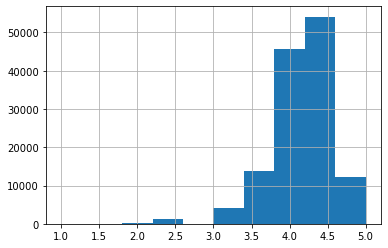

In [866]:
pd.to_numeric(restaurantes.puntaje_global.str.replace(",", ".")).hist()

<AxesSubplot:>

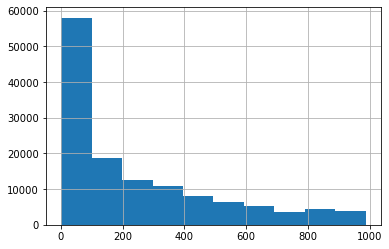

In [867]:
pd.to_numeric(restaurantes.n_comentarios.str.replace(",", ".")).hist()